In [17]:
from dpm.models import LinearRegression, L1Regression, RidgeRegression, LassoRegression, LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from dpm.visualize import plot_stats
import torch

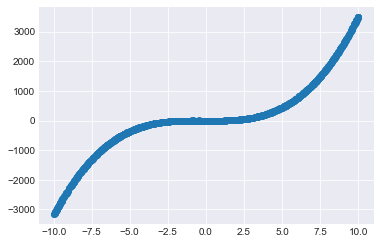

In [18]:
N = 1000

x = np.random.uniform(-10, 10, (N, 1))
x = np.concatenate((x**3, x**2, x), axis = 1)
# print(x[:, 1])
w = np.array([[3.4], [1.6], [-4.5]])
b = -4.2
y = x @ w  + b + np.random.normal(0, 1, (N, 1))
plt.scatter(x[:, 2], y); plt.show()


In [19]:
model = LinearRegression(input_dim=3)

In [20]:
[p.view(-1) for p in model.model.parameters()]

[tensor([-0.4148,  0.5069,  0.3289], grad_fn=<ViewBackward>),
 tensor([0.2069], grad_fn=<ViewBackward>)]

In [21]:
torch.cat([p.view(-1) for p in model.model.parameters()])

tensor([-0.4148,  0.5069,  0.3289,  0.2069], grad_fn=<CatBackward>)

In [22]:
stats = model.fit(x, y, epochs=1000, lr=0.1, batch_size=1024)

In [23]:
[p.view(-1) for p in model.model.parameters()]

[tensor([3.3247, 1.5985, 0.8662], grad_fn=<ViewBackward>),
 tensor([-3.7201], grad_fn=<ViewBackward>)]

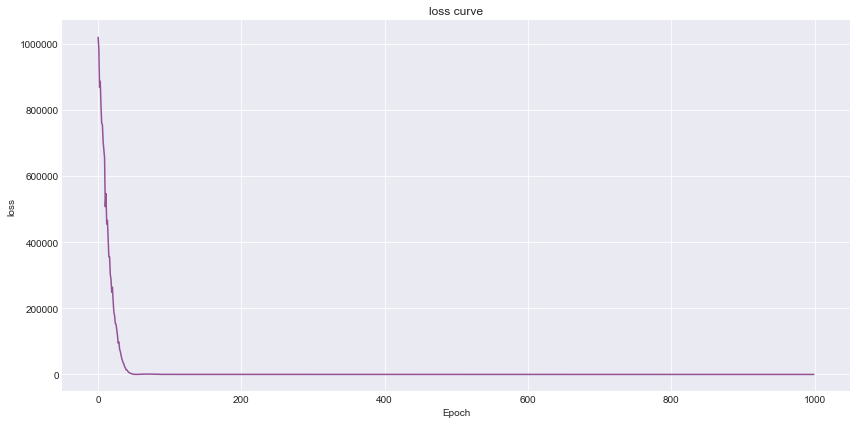

In [24]:
plot_stats(stats)

In [25]:
[p for p in model.model.parameters()]
torch.cat([p.view(-1) for p in model.model.parameters()], dim=0).view(-1, 1)

tensor([[ 3.3247],
        [ 1.5985],
        [ 0.8662],
        [-3.7201]], grad_fn=<ViewBackward>)

In [26]:
y[5]

array([-1676.94988474])

In [27]:
# model.predict(torch.tensor(x).float()).detach().numpy()
model(x)[0][5]

tensor([-1679.9423], grad_fn=<SelectBackward>)

torch.Size([1000, 3])


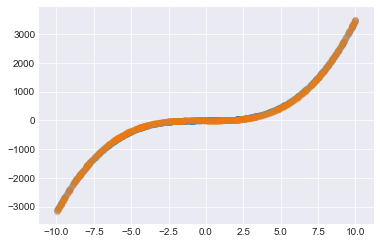

In [28]:
plt.scatter(x[:, 2], model.predict(x).detach().numpy(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()

torch.Size([1000, 3])


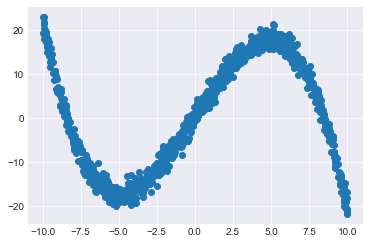

In [29]:
y_pred = model.predict(x).detach()
residual = y_pred - torch.tensor(y).float()
plt.scatter(x[:, 2], residual)

In [30]:
print(residual.mean())
print(residual.var())

tensor(0.0517)
tensor(156.3020)


torch.Size([1000, 3])


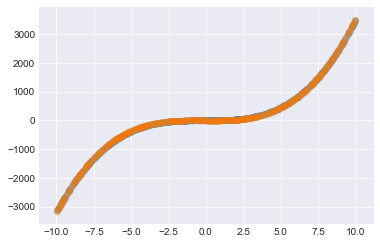

In [32]:
model = L1Regression(input_dim=3)
model.fit(x, y)
plt.scatter(x[:, 2], model.predict(x).detach().numpy(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()

torch.Size([1000, 3])


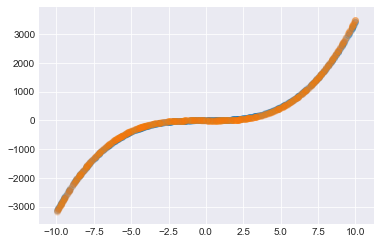

In [33]:
model = RidgeRegression(input_dim=3, tau=4.)
model.fit(x, y)
plt.scatter(x[:, 2], model.predict(x).detach().numpy(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()

torch.Size([1000, 3])


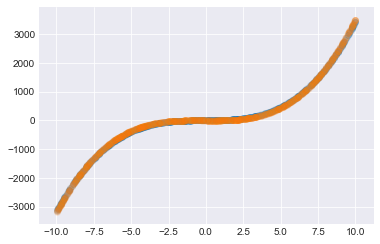

In [34]:
model = LassoRegression(input_dim=3, tau=4.)
model.fit(x, y)
plt.scatter(x[:, 2], model.predict(x).detach().numpy(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()